# Pigment databases
Notebook demoing the ability to load and visualize pigment databases that can be mixed and layered with the Kubelka-Munk model.

In [1]:
# Libraries to speed up computations
import haiku as hk
import jax

# Import modules to apply the Kubelka-Munk model and convert to RGB for rendering to the screen
from painting_tools.util.plots import show_colors, show_spectra
from painting_tools.painting import Painting, set_painting_params
from painting_tools.rendering import saunderson_correction

import numpy as np
import matplotlib.pyplot as plt

INFO:2025-02-13 15:59:33,022:jax._src.xla_bridge:945: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-02-13 15:59:33,023:jax._src.xla_bridge:945: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


Pigment datasets can be loaded using the layering package using a `PigmentDatabase` wrapper class. The pigment database represents a folder that can span multiple pigment sets. You can load one set of pigments with the `get_pigments` function.

In [2]:
from painting_tools.measurements.pigments import PigmentDatabase

# Load the pigment database
db_basic = PigmentDatabase('basic')

# Get the cmy set from the basic pigment database
pigments_cmy, names_cmy = db_basic['cmy']

names_cmy

['cyan', 'magenta', 'yellow']

Let's create a quick convenience function to show all pigments in one set.

Pigment set: cmy


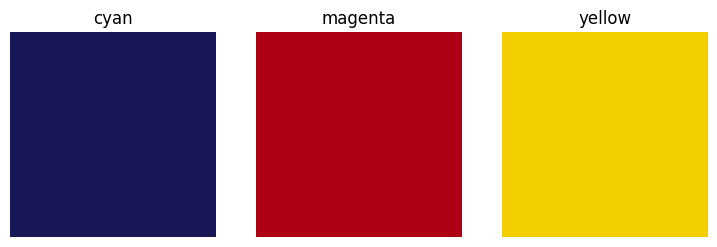

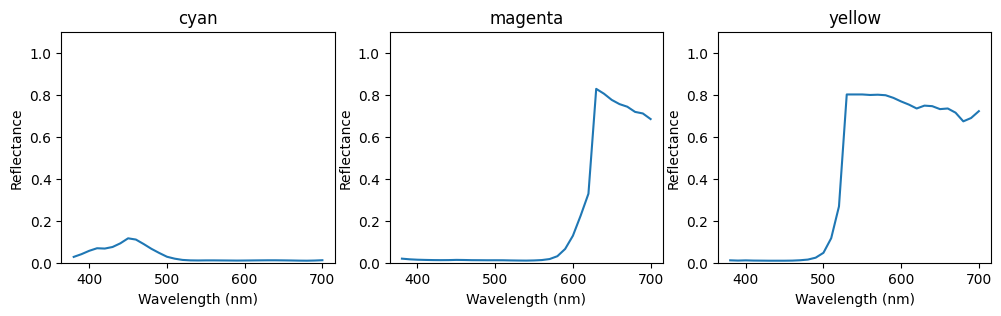

In [3]:
def show_pigment_set(db, set, opaque=False, saunderson=False, plot_reflectance=False):
    print('Pigment set:', set)
    pigments, names = db[set]
    def painting_simple():
        painting = Painting(1, 1, pigments, n_layers=1, opaque=opaque)
        return painting.spectral()
        
    rng_key = jax.random.PRNGKey(42)
    painting = hk.without_apply_rng(hk.transform(painting_simple))
    params = painting.init(rng_key)
    paint = painting.apply

    # Render each pigment just one
    if saunderson:
        paintings = [saunderson_correction(paint(set_painting_params(params, [w[None, None]], [np.ones((1, 1))])), 0.0307805, 0.60602703) for w in np.eye(len(pigments))]
    else:
        paintings = [paint(set_painting_params(params, [w[None, None]], [np.ones((1, 1))])) for w in np.eye(len(pigments))]
    show_spectra(paintings, labels=names, spectra=db.spectra)

    if plot_reflectance:
        # Plot each spectrum as a line plot using Matplotlib's subfigure
        fig, axes = plt.subplots(1, len(paintings), figsize=(len(paintings) * 4, 3))
        for i, ax in enumerate(axes):
            ax.plot(db.spectra, paintings[i][0, 0])
            ax.set_ylim(0, 1.1)
            ax.set_title(names[i])
            ax.set_xlabel('Wavelength (nm)')
            ax.set_ylabel('Reflectance')
        plt.show()

show_pigment_set(db_basic, 'cmy', plot_reflectance=True, opaque=True)

# Oil paint dataset
Created as part of this dataset by Ruben Wiersma at the CGV group in Delft (graphics.tudelft.nl).

Pigment set: oilpaint


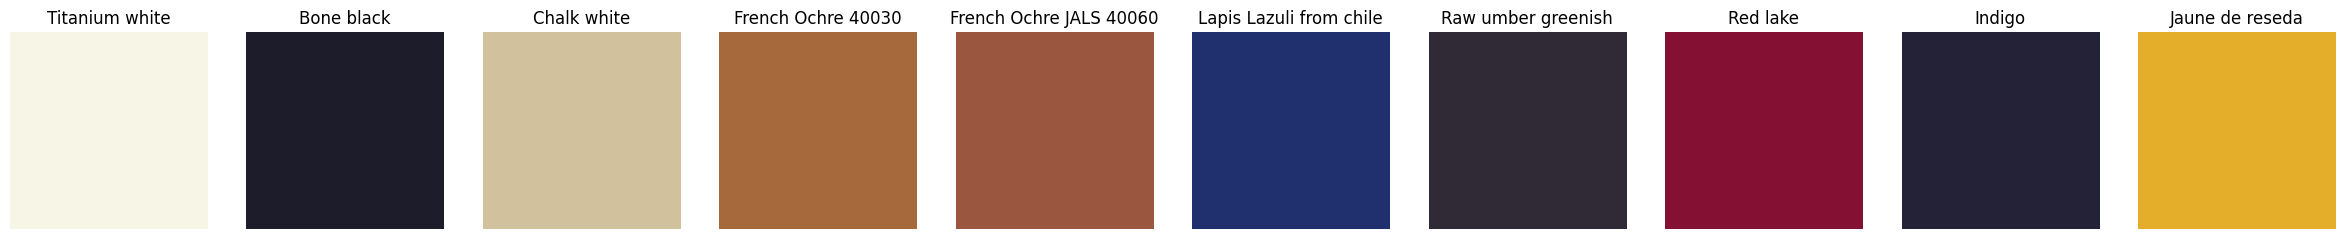

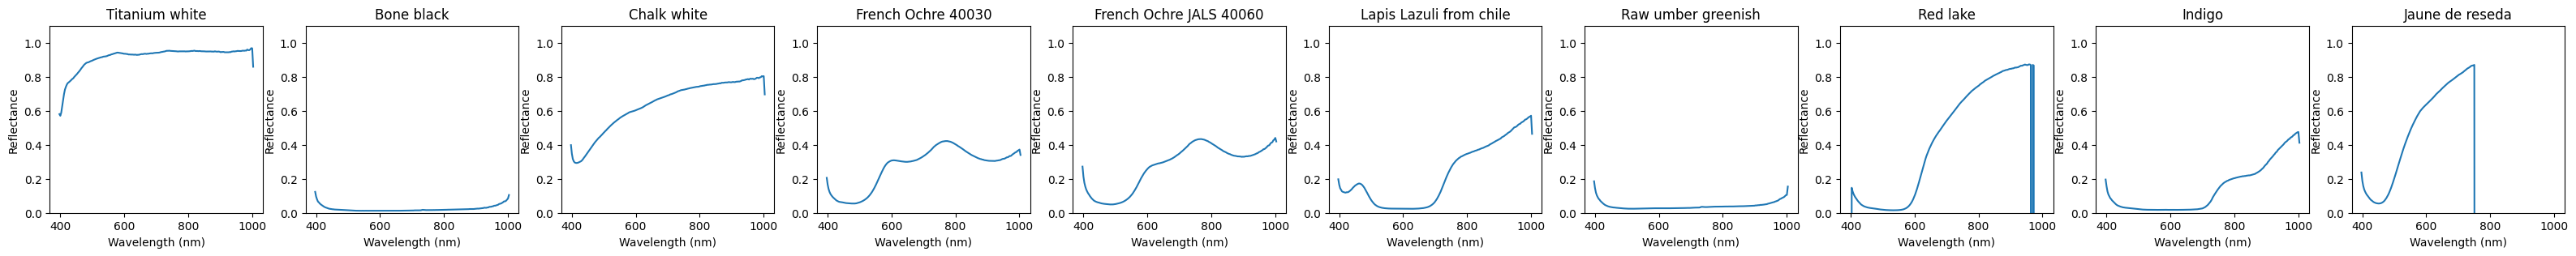

In [4]:
# Load the pigment database
db_oilpaint = PigmentDatabase('oilpaint') # Alternatively import oilpaint from layering.measurements.pigments

# Show Curtis set
show_pigment_set(db_oilpaint, 'oilpaint', plot_reflectance=True, opaque=True)

# Curtis dataset
From the paper computer-generated watercolor by Curtis et al.

Pigment set: curtis


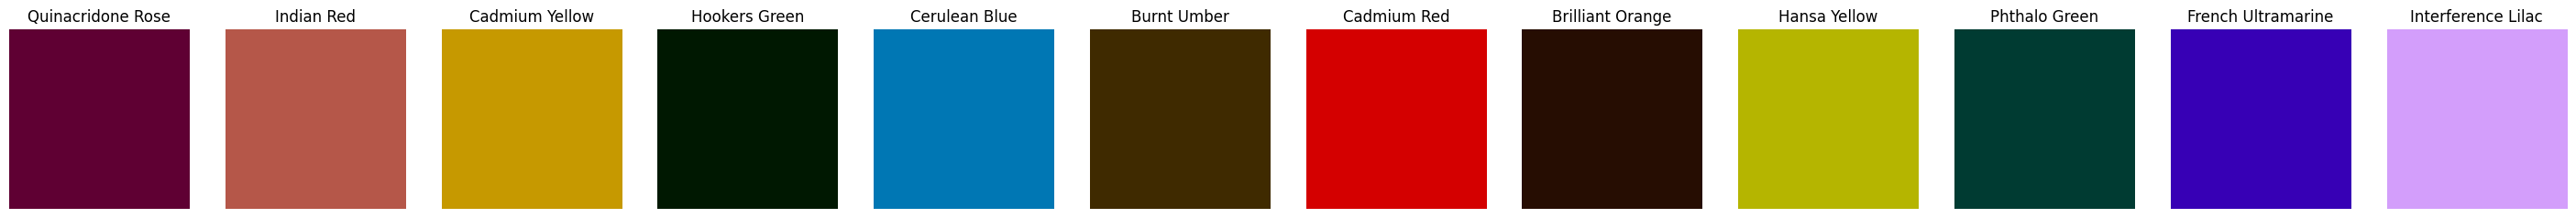

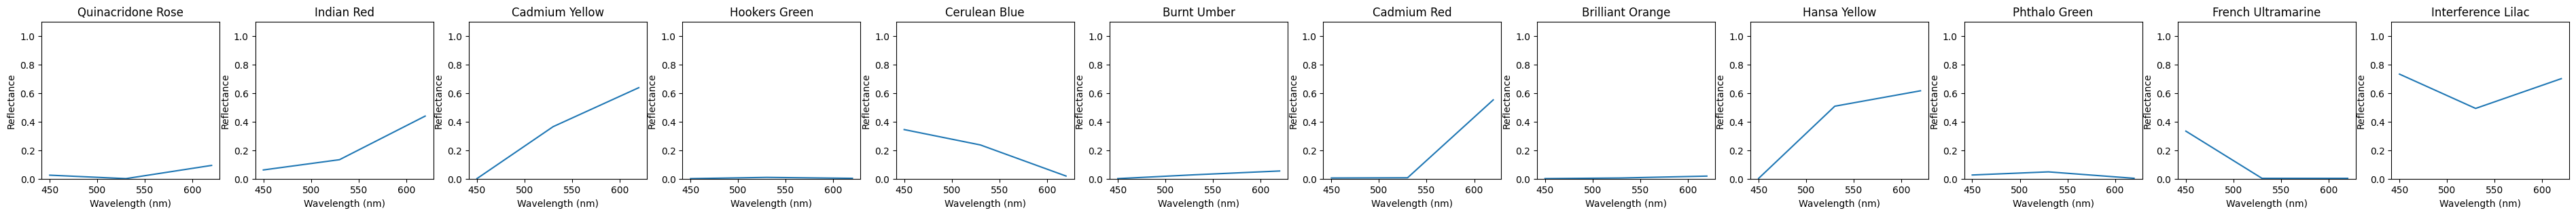

In [5]:
# Load the pigment database
db_curtis = PigmentDatabase('curtis') # Alternatively import curtis from layering.measurements.pigments

# Show Curtis set
show_pigment_set(db_curtis, 'curtis', plot_reflectance=True, opaque=True)

# Okumura database
Measurements by Yoshi Okumura ([see thesis](https://repository.rit.edu/cgi/viewcontent.cgi?article=5896&context=theses)).

Pigment set: okumura


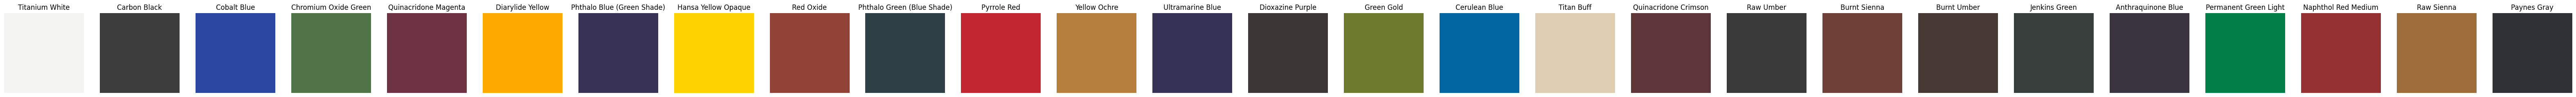

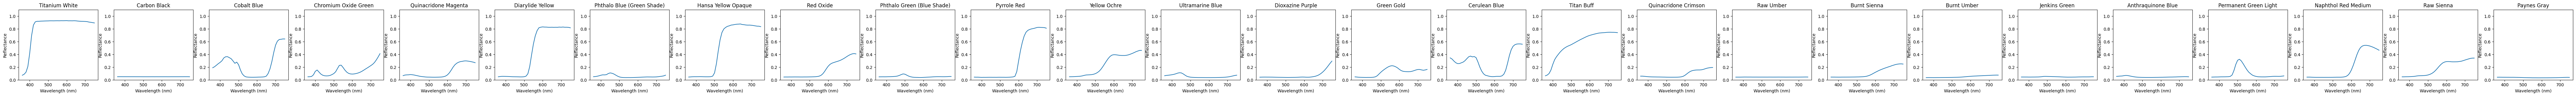

In [6]:
from painting_tools.rendering import saunderson_correction

# Load the pigment database
db_okumura = PigmentDatabase('okumura') # Alternatively import curtis from layering.measurements.pigments

# Show Okumura set
show_pigment_set(db_okumura, 'okumura', opaque=True, saunderson=True, plot_reflectance=True)

## CMT database

For the CMT database (https://zsolt-kovacs.unibs.it/colormixingtools/), we only have pigment ratio's, so we can only use the opaque KM model. We need an adjusted color function for this.

In [6]:
from ipywidgets import interact_manual, Dropdown

# Load the cmt database
db_cmt = PigmentDatabase('cmt')

sets = db_cmt.pigment_sets
sets.sort()

interact_manual(lambda set: show_pigment_set(db_cmt, set, opaque=True), set=Dropdown(options=sets), name='Update')

interactive(children=(Dropdown(description='set', options=('BobRoss_LP', 'Chartpak_GrumbacherMAX', 'Chartpak_G…

<function __main__.<lambda>(set)>